In [57]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

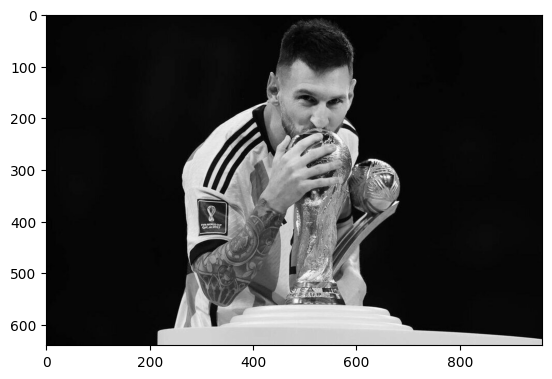

In [58]:
messi = np.array(Image.open("imagenes/messi.jpeg").convert("L"))
patron1 = np.array(Image.open("imagenes/patron.jpg").convert("L"))
patron2 = np.array(Image.open("imagenes/patron.png").convert("L"))

plt.imshow(messi, cmap='gray')
plt.show()

In [59]:
messi

array([[  6,   6,   5, ...,  11,  10,  10],
       [  6,   6,   5, ...,  10,  10,  10],
       [  6,   6,   5, ...,  10,  10,   9],
       ...,
       [  3,   3,   3, ..., 208, 207, 206],
       [  3,   3,   3, ..., 209, 208, 207],
       [  3,   3,   3, ..., 209, 208, 207]], dtype=uint8)

In [60]:
from scipy import signal

def apply_convolution(image, kernel):
    # Apply convolution
    filtered_image = signal.convolve2d(image, kernel)
    print

    # Plot original and filtered image
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(image, cmap='gray')
    ax1.set_title('Imagen Original')
    ax2.imshow(np.absolute(filtered_image), cmap='gray')
    ax2.set_title('Con Filtro')
    plt.show()

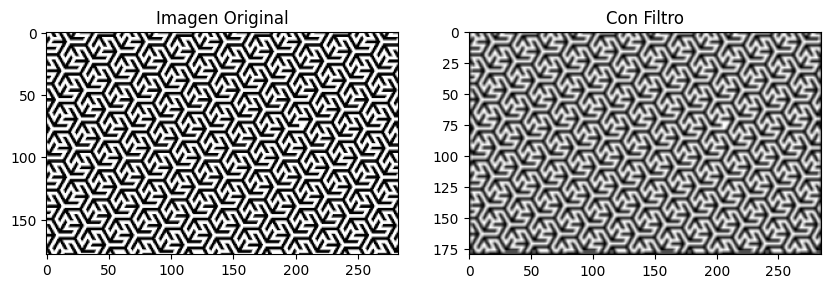

In [61]:
blur = np.array([
    [1/9,1/9,1/9],
    [1/9,1/9,1/9],
    [1/9,1/9,1/9]
    ])

apply_convolution(patron2, blur)

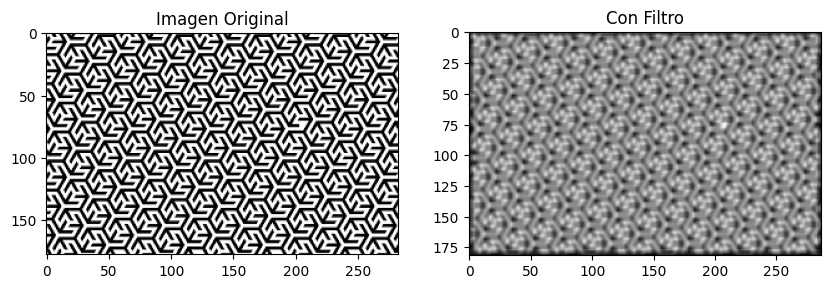

In [62]:
blur_large = np.array([[1/25, 1/25, 1/25, 1/25, 1/25],
                         [1/25, 1/25, 1/25, 1/25, 1/25],
                         [1/25, 1/25, 1/25, 1/25, 1/25],
                         [1/25, 1/25, 1/25, 1/25, 1/25],
                         [1/25, 1/25, 1/25, 1/25, 1/25]])

apply_convolution(patron2, blur_large)

[[4.50630921e-06 1.00692549e-05 2.05764819e-05 3.84542330e-05
  6.57230980e-05 1.02729251e-04 1.46849880e-04 1.91980617e-04
  2.29533554e-04 2.50980780e-04 2.50980780e-04 2.29533554e-04
  1.91980617e-04 1.46849880e-04 1.02729251e-04 6.57230980e-05
  3.84542330e-05 2.05764819e-05 1.00692549e-05 4.50630921e-06]
 [1.00692549e-05 2.24995423e-05 4.59777241e-05 8.59251901e-05
  1.46856906e-04 2.29546391e-04 3.28133027e-04 4.28976726e-04
  5.12887990e-04 5.60811372e-04 5.60811372e-04 5.12887990e-04
  4.28976726e-04 3.28133027e-04 2.29546391e-04 1.46856906e-04
  8.59251901e-05 4.59777241e-05 2.24995423e-05 1.00692549e-05]
 [2.05764819e-05 4.59777241e-05 9.39552940e-05 1.75587780e-04
  3.00101496e-04 4.69077126e-04 6.70538518e-04 8.76612212e-04
  1.04808454e-03 1.14601578e-03 1.14601578e-03 1.04808454e-03
  8.76612212e-04 6.70538518e-04 4.69077126e-04 3.00101496e-04
  1.75587780e-04 9.39552940e-05 4.59777241e-05 2.05764819e-05]
 [3.84542330e-05 8.59251901e-05 1.75587780e-04 3.28146154e-04
  5.6

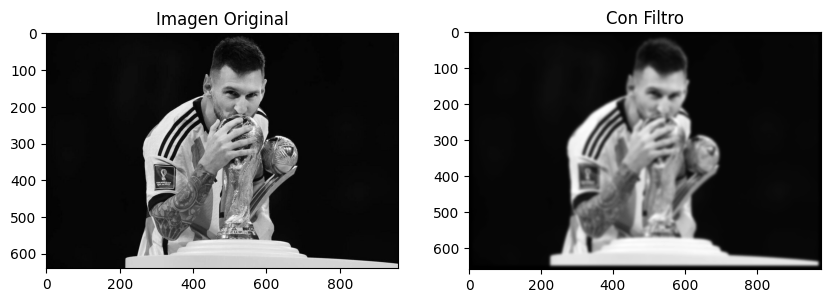

In [63]:
import scipy.stats as st

def gkern(kernlen=21, nsig=3):
    """Returns a 2D Gaussian kernel."""

    x = np.linspace(-nsig, nsig, kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kern2d = np.outer(kern1d, kern1d)
    return kern2d/kern2d.sum()

gaussian_blur = gkern(20)
print(gaussian_blur)
apply_convolution(messi, gaussian_blur)

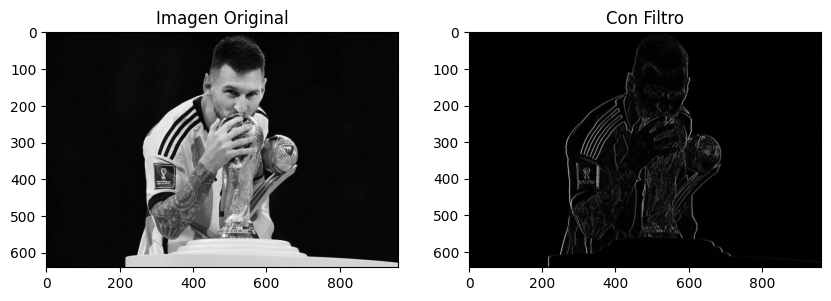

In [64]:
ejes_verticales = np.array([[-1,0,1],
                              [-1,0,1],
                              [-1,0,1]])

apply_convolution(messi, ejes_verticales)

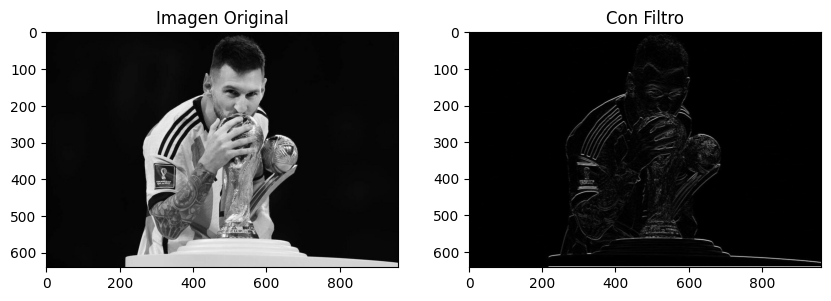

In [65]:
ejes_horizontales = np.array([[-1,-1,-1],
                            [0,0,0],
                            [1,1,1]])

apply_convolution(messi, ejes_horizontales)

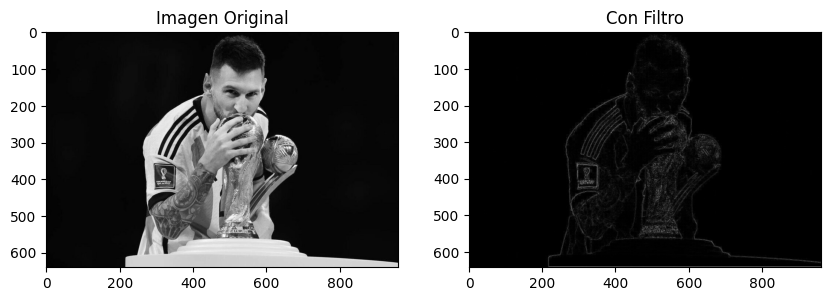

In [66]:
laplacian_kernel = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])

apply_convolution(messi, laplacian_kernel)